# LINEAR REGRESSION IN MULTIPLE VARIABLES (VECTORIZED/ MATRIX FORM) FROM SCRATCH IN PYTHON 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
from sklearn.metrics import mean_squared_error

In [20]:
train=pd.read_csv('/home/atul/Downloads/train.csv')
test=pd.read_csv('/home/atul/Downloads/test1.csv')

In [21]:
train.head() #1st 5 rows of train

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [22]:
test.head() #1st 5 rows of tests

,AT,V,AP,RH,PE
0,8.67,40.77,1011.81,89.40,479.23
1,10.53,37.50,1008.55,99.91,472.32
2,7.99,41.38,1021.95,78.77,487.57
3,22.29,45.01,1012.40,51.58,449.08
4,9.06,36.30,1015.14,58.71,477.38


# Algorithms

error_thres = Error Threshold  
maxi = max. no. of iterations   
s = step size or learning rate  
theta = parameter array(to learn) Initialized with random float values between 0 and 1  
J = cost Function    
Jval = list of error values  
m = no. of training examples

In [23]:
def linearRegression(error_thres,maxi,s):
    Jval = []
    theta=np.matrix([np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1),np.random.uniform(0,1)])   
    for i in range(maxi):
        Y=theta.dot(X)
        J=(((1/(2*len(Y)))*np.sum(np.square(Y-yTrainTarget))))
        Jval.append(J)
        if(J<error_thres or (len(Jval)>10 and np.mean(Jval[-10:])==Jval[-1])):
            break
        else:
            theta=gradientDescent(X,yTrainTarget,theta.T,s).T
    return(theta, Jval)

In [24]:
def gradientDescent(A,B,theta,s):
        t=s/m
        theta=theta-(t*(((theta.T.dot(A))-B).dot(A.T)).T)
        return(theta)

# Training

In [25]:
m=len(train) #no. of training examples
m

299

## Converting Train Data Frames in matrix form

In [26]:
trd=train.T 
m=len(train)
X=np.array([trd.iloc[0].values,trd.iloc[1].values,trd.iloc[2].values,trd.iloc[3].values,np.ones(m)])
X

array([[8.34000e+00, 2.36400e+01, 2.97400e+01, ..., 3.05900e+01,
        1.40400e+01, 1.54700e+01],
       [4.07700e+01, 5.84900e+01, 5.69000e+01, ..., 7.00400e+01,
        4.87900e+01, 4.49000e+01],
       [1.01084e+03, 1.01140e+03, 1.00715e+03, ..., 1.01028e+03,
        1.01762e+03, 1.02159e+03],
       [9.00100e+01, 7.42000e+01, 4.19100e+01, ..., 5.05600e+01,
        7.52500e+01, 8.17400e+01],
       [1.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]])

## True target values

In [27]:
yTrainTarget=trd.iloc[4].values
yTrainTarget 

array([480.48, 445.75, 438.76, 453.09, 464.43, 470.96, 442.35, 464.  ,
       428.77, 484.31, 435.29, 451.41, 426.25, 480.66, 460.17, 453.13,
       461.71, 471.08, 473.74, 448.56, 464.82, 427.28, 441.76, 474.71,
       467.21, 487.69, 438.67, 485.66, 452.16, 429.87, 468.82, 442.85,
       483.26, 433.59, 433.04, 458.6 , 435.14, 443.2 , 477.9 , 445.26,
       435.57, 447.42, 462.28, 441.81, 454.16, 437.24, 464.11, 440.89,
       485.2 , 445.34, 440.  , 431.35, 456.32, 432.98, 429.41, 464.95,
       481.91, 437.15, 462.6 , 432.43, 442.22, 441.03, 468.91, 432.46,
       430.07, 437.78, 483.12, 462.19, 457.71, 438.32, 434.35, 427.05,
       448.69, 475.88, 479.28, 446.85, 434.99, 441.5 , 433.26, 430.46,
       455.14, 431.26, 437.76, 464.63, 462.58, 483.27, 438.51, 431.03,
       484.  , 431.64, 451.78, 439.46, 467.23, 459.81, 447.15, 442.  ,
       449.61, 481.28, 437.54, 475.52, 458.68, 436.76, 446.08, 474.35,
       481.96, 479.66, 435.28, 434.86, 435.72, 454.14, 455.76, 442.83,
      

### Learnt parameter values

In [28]:
theta,Jval=linearRegression(0.001,1000,0.000001)
theta

matrix([[0.23081323, 0.19512419, 0.4076704 , 0.35731001, 0.0879259 ]])

Text(0, 0.5, 'Error or Cost Function')

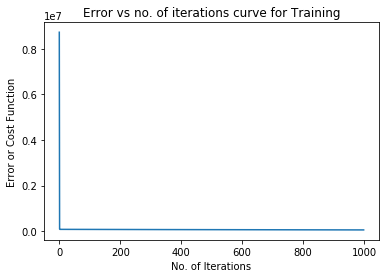

In [29]:
pt.plot(range(len(Jval)),Jval)
pt.title('Error vs no. of iterations curve for Training')
pt.xlabel('No. of Iterations')
pt.ylabel('Error or Cost Function')

In [30]:
yPredTrain = theta.dot(X)
yPredTrain

matrix([[454.21914427, 455.78741144, 443.61498513, 452.23687277,
         460.12960023, 455.39538845, 457.04662919, 456.22385444,
         445.87267248, 453.01586892, 455.25365718, 445.64869867,
         454.52973613, 449.34040663, 448.42719401, 455.69785907,
         442.50460181, 458.19450042, 450.13161507, 435.64264522,
         455.14434155, 447.8649087 , 456.84172499, 459.1258824 ,
         453.58355448, 454.1766689 , 456.79601712, 457.91170764,
         452.01452284, 451.09775441, 450.75081892, 458.58207763,
         454.15165788, 450.48035898, 449.44167494, 452.45675859,
         462.4251761 , 458.30739049, 452.74333919, 453.83367051,
         453.08835284, 459.45889003, 439.67283626, 449.63446492,
         461.26280409, 453.81652156, 451.73425549, 447.77946694,
         451.4666887 , 454.98068754, 462.78483019, 445.60722465,
         450.49335012, 460.07561776, 452.5501909 , 453.79383163,
         452.74072974, 457.66696902, 459.25847738, 456.88600529,
         457.22078091, 44

In [31]:
yPredTrain

matrix([[454.21914427, 455.78741144, 443.61498513, 452.23687277,
         460.12960023, 455.39538845, 457.04662919, 456.22385444,
         445.87267248, 453.01586892, 455.25365718, 445.64869867,
         454.52973613, 449.34040663, 448.42719401, 455.69785907,
         442.50460181, 458.19450042, 450.13161507, 435.64264522,
         455.14434155, 447.8649087 , 456.84172499, 459.1258824 ,
         453.58355448, 454.1766689 , 456.79601712, 457.91170764,
         452.01452284, 451.09775441, 450.75081892, 458.58207763,
         454.15165788, 450.48035898, 449.44167494, 452.45675859,
         462.4251761 , 458.30739049, 452.74333919, 453.83367051,
         453.08835284, 459.45889003, 439.67283626, 449.63446492,
         461.26280409, 453.81652156, 451.73425549, 447.77946694,
         451.4666887 , 454.98068754, 462.78483019, 445.60722465,
         450.49335012, 460.07561776, 452.5501909 , 453.79383163,
         452.74072974, 457.66696902, 459.25847738, 456.88600529,
         457.22078091, 44

### Root Mean Squared Error for Train

In [32]:
np.sqrt(mean_squared_error(yTrainTarget,yPredTrain.T))

18.33520347139191

# Testing

## preparing Test Data

In [33]:
tsd=test.T 
m=len(test)
Xtest=np.array([tsd.iloc[0].values,tsd.iloc[1].values,tsd.iloc[2].values,tsd.iloc[3].values,np.ones(m)])
Xtest.shape

(5, 200)

In [34]:
yTestTarget=tsd.iloc[4].values
yTestTarget 

array([479.23, 472.32, 487.57, 449.08, 477.38, 474.16, 454.25, 429.85,
       462.98, 434.04, 470.84, 488.65, 473.94, 437.42, 457.12, 457.49,
       443.41, 445.27, 436.74, 487.33, 434.43, 437.14, 439.96, 442.58,
       436.88, 441.94, 438.62, 470.55, 441.76, 450.88, 482.89, 454.41,
       479.15, 458.67, 446.91, 466.52, 444.16, 489.09, 475.01, 471.43,
       455.24, 445.49, 430.56, 471.78, 443.15, 475.  , 474.22, 445.71,
       491.29, 437.87, 467.44, 437.14, 448.24, 447.2 , 478.12, 465.44,
       445.65, 437.4 , 455.66, 445.83, 449.36, 436.26, 452.99, 431.72,
       481.83, 433.08, 446.87, 463.03, 440.77, 430.91, 445.93, 430.34,
       462.46, 460.08, 441.76, 449.66, 436.38, 452.07, 467.35, 473.87,
       460.7 , 479.53, 467.46, 440.27, 454.32, 442.48, 435.76, 439.56,
       467.  , 462.6 , 472.16, 448.46, 434.11, 449.74, 439.29, 473.2 ,
       437.62, 491.49, 495.23, 442.75, 480.74, 461.38, 461.74, 489.54,
       477.61, 461.49, 474.93, 447.89, 481.02, 470.68, 440.92, 453.38,
      

## Applying Learned theta values from Trained model on test data to predict values

In [35]:
yPredTest = theta.dot(Xtest)
yPredTest

matrix([[454.47279382, 456.69037309, 454.77043899, 445.1708574 ,
         444.08230395, 449.62270822, 447.31867166, 453.53341203,
         458.53748801, 462.76147084, 445.47626944, 455.86398893,
         449.32459242, 460.99627706, 457.83950789, 452.77583638,
         454.64038239, 459.16889134, 461.0530285 , 451.44839636,
         453.63080424, 457.10916975, 453.55977871, 448.99800888,
         450.79159986, 444.32099375, 464.4317204 , 457.96340855,
         453.69143739, 443.75592802, 455.63336554, 452.71906154,
         448.75959215, 446.8668009 , 458.10084488, 458.08977598,
         453.88830232, 452.16177441, 461.83832303, 446.58134056,
         460.64468969, 443.75609382, 443.06034687, 448.53469605,
         450.61823516, 453.51324894, 455.09739057, 452.78591498,
         448.5266233 , 452.72126445, 456.19493869, 455.70632137,
         456.11016406, 448.22592172, 461.3173877 , 460.19666432,
         456.49660161, 453.86972788, 449.27705293, 463.4106558 ,
         465.33984779, 45

### Root Mean Squared Error for Test


In [36]:
np.sqrt(mean_squared_error(yTestTarget,yPredTest.T))

18.466233853997778